In [293]:
%matplotlib inline

In [294]:
from clawpack.geoclaw import dtopotools
import numpy as np
import matplotlib.pyplot as pl

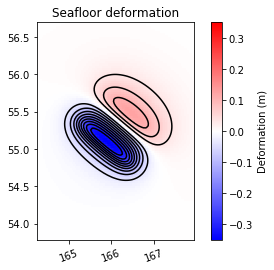

In [295]:
LAT2METER = dtopotools.LAT2METER

fault = dtopotools.SiftFault({'acsza2':1.})

# adjust width?
# fault.subfaults[0].width = 1.
# fault.subfaults[0].length = 1.
# fault.subfaults[0].calculate_geometry()

# Find a sufficiently large rectangle containing the fault
lims = fault.containing_rect()


x0 = lims[0]-1.
x1 = lims[1]+1.

y0 = lims[2]-1.
y1 = lims[3]+1.

x = np.linspace(x0,x1,100)
y = np.linspace(y0,y1,100)
fault.subfaults[0].slip = -1.
dtopo0 = fault.create_dtopography(x,y,times=[0.])
dtopo0.plot_dZ_colors(0.);

In [296]:
subfault0 = fault.subfaults[0]
subfault0.coordinate_specification

'noaa sift'

In [297]:
rect_corners = subfault0.corners

rect_corners[0][2] = -rect_corners[0][2] 
rect_corners[1][2] = -rect_corners[1][2] 
rect_corners[2][2] = -rect_corners[2][2] 
rect_corners[3][2] = -rect_corners[3][2] 

In [298]:
subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [rect_corners[0],rect_corners[1],rect_corners[2]]
subfault1.calculate_geometry_triangles()

subfault2 = dtopotools.SubFault()
subfault2.slip = 1.
subfault2.coordinate_specification = 'triangular'
subfault2._corners = [rect_corners[0],rect_corners[1],rect_corners[2]]
subfault2.calculate_geometry_triangles()

In [299]:
subfault1.strike 

-64.389906715545536

In [300]:
subfault2.strike + 360.

295.61009328445448

In [301]:
subfault0.strike

310.17

In [302]:
subfault0.corners

[[165.24757190845202, 55.363048649884426, -19610.0],
 [165.73634499162765, 55.691816587449004, -34228.585236136838],
 [166.94725500837237, 55.111383412551, -34228.585236136838],
 [166.45848192519674, 54.782615474986422, -19610.0]]

In [303]:
# subfault0.width = 1.
# subfault0.length = 1.
# subfault0.calculate_geometry()

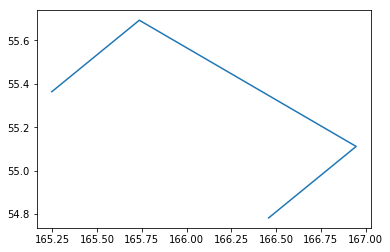

In [304]:
y = np.array(subfault0.corners)
pl.plot(y[:,0],y[:,1]);

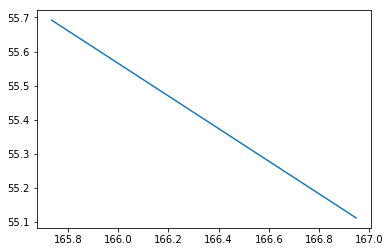

In [305]:
y = np.array(subfault0.corners)
pl.plot(y[1:3,0],y[1:3,1]);

In [310]:
dy = y[1:3,0] - y[1:3,1]
theta = np.rad2deg(np.arctan2(dy[0],dy[1]))
print 'computed strike: ', 360. - theta 
print 'designated strike: ', subfault0.strike

computed strike:  315.462565304
designated strike:  310.17


## Right angle test

dy1 =  [-54319.22968096 -36537.24341013  14618.58523614]
dy2 =  [ 134573.08020151  -64505.76765989       0.        ]


-4953043117.9937553

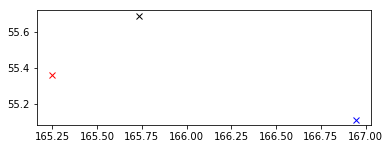

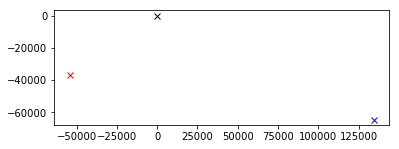

In [307]:
y = np.array(subfault0.corners)

pl.figure()
pl.plot(y[0,0],y[0,1],'rx')
pl.plot(y[2,0],y[2,1],'bx')
pl.plot(y[1,0],y[1,1],'kx')
pl.axis('scaled')

dy1 =   y[0,:] - y[1,:]
dy2 =   y[2,:] - y[1,:]

dy1[:2] *= LAT2METER
dy2[:2] *= LAT2METER

pl.figure()
pl.plot(dy1[0],dy1[1],'rx')
pl.plot(dy2[0],dy2[1],'bx')
pl.plot(0.,0.,'kx')
pl.axis('scaled')



print 'dy1 = ', dy1
print 'dy2 = ', dy2
np.dot(dy1,dy2)

In [308]:
LAT2METER

111133.84012073894

In [309]:
dy1[2]

14618.585236136838